In [1]:
import os
from sys import stdout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from math import sqrt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

In [67]:
#x_df = pd.read_csv('data_with_avg_intesities_reduced.csv', sep = ',')
x_df = pd.read_csv('data_with_avg_intesities_reduced.csv', sep = ',')
values = x_df.values
#wl=x_df.columns.values
#print(wl.shape)

#print(values)
#print(type(values))
print(values.shape)
print(values[1].shape)
print(len(values))

(20, 4094)
(4094,)
20


[188.1951 188.2601 188.325  ... 440.6714 440.7245 440.7775]


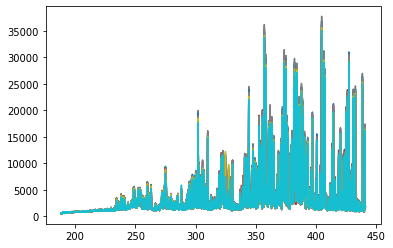

In [68]:
#This is just for visualizing the various plots of the samples

df = pd.read_csv('./data/040_A07_Zanardi_QS277us_200Hz_delay1us_exp1ms', sep = '\t')
df1=df.drop(columns=['Pixels'])
df1=df1.dropna(axis=1)
data=df1.values
wl= data[0]
print(wl)

for i in range(len(values)):
    plt.plot(wl, values[i])
    #plt.show() #comment this one to have unique plot instead of multiple ones
#range(len(dfs))




In [69]:
df_y = pd.read_csv('labels_aligned.csv', sep = ',')
print(type(df_y))
concentration=df_y.values
print(concentration.shape)
#print(concentration)
df_y

<class 'pandas.core.frame.DataFrame'>
(20, 9)


Sample Name     Fe    Si    Mn    Cu     Ni     Cr     Mo      Mg
0          B16  93.63  2.48  0.12  0.13  0.052  0.024  0.012  0.0300
1          B15  93.55  2.53  0.13  0.13  0.093  0.024  0.012  0.0330
2          B14  93.65  2.49  0.12  0.13  0.110  0.024  0.012  0.0360
3          B13  91.68  2.46  0.19  0.64  1.180  0.023  0.270  0.0580
4          B12  92.47  2.62  0.36  0.83  0.070  0.022  0.018  0.0490
5          B11  93.23  2.31  0.17  0.55  0.061  0.025  0.014  0.0720
6          B10  93.24  2.27  0.17  0.55  0.061  0.025  0.013  0.0660
7          A01  92.94  1.84  0.19  0.64  0.420  0.022  0.269  0.0024
8          A02  93.35  1.80  0.17  0.48  0.370  0.022  0.173  0.0017
9          A03  94.15  1.59  0.14  0.32  0.060  0.024  0.016  0.0010
10         A04  93.70  1.38  0.20  0.66  0.040  0.018  0.269  0.0017
11         A05  94.33  1.63  0.12  0.11  0.090  0.019  0.019  0.0022
12         A06  94.51  1.50  0.12  0.09  0.040  0.021  0.009  0.0009
13         A07  94.01  1.31  0.20  0.61  0.070  0.019  0.016  0.0046
14         C17  92.27  2.54  0.16  1.13  0.095  0.027  0.027  0.0568
15         C18  92.79  2.40  0.21  0.65  0.071  0.019  0.265  0.0470
16         C19  91.81  2.39  0.20  0.65  1.100  0.021  0.267  0.0542
17         C20  91.81  2.42  0.19  0.65  1.060  0.021  0.263  0.0442
18         C21  92.37  2.61  0.16  1.17  0.062  0.019  0.015  0.0504
19         C22  92.07  4.40  0.20  0.14  0.053  0.022  0.012  0.0468

In [70]:
y_si = concentration[:,2]
print(y_si)
print(y_si.shape)

[2.48 2.53 2.49 2.46 2.62 2.31 2.27 1.84 1.8 1.59 1.38 1.63 1.5 1.31 2.54
 2.4 2.39 2.42 2.61 4.4]
(20,)


In [71]:
df_y_si= pd.DataFrame(y_si)
#df_y_si

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x_df, df_y_si, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(16, 4094) (16, 1)
(4, 4094) (4, 1)


# Principal Components Analysis

In [73]:
n_components=10

x_df = pd.read_csv('data_with_avg_intesities.csv', sep = ',')
x_df = pd.read_csv('data_with_avg_intesities_reduced.csv', sep = ',')
x = x_df.values
print(x.shape)
print(x[1].shape)
print(len(x))


# This has to be used later for regression, PCA is done on X only
"""
y_df = pd.read_csv('labels_aligned+.csv', sep = ',')
concentration=y_df.values
#print(concentration)
multi_y = concentration[:,2:]
#print (multi_y)
print (multi_y.shape)
multi_y= np.array(multi_y, dtype=np.float)
y=np.around(multi_y, decimals=4)
#print(y)
"""

# PCA

X_std = StandardScaler().fit_transform(x)
#print(X_std)

pca = PCA(n_components= n_components)
PC=pca.fit(X_std)

principalComponents = pca.fit_transform(X_std)
print(principalComponents.shape)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
#print(principalDf)


#print(pca.explained_variance_ratio_)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
#print(pca.singular_values_)

(20, 4094)
(4094,)
20
(20, 10)
[56.8  75.48 85.99 91.38 94.2  95.8  96.9  97.74 98.39 98.82]


#### This is the *mathematical* way to do it

In [74]:
"""cov_mat = np.cov(X_std.T) #covariance matrix
#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

tot = sum(eig_vals)
print(tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

#print(np.round(cum_var_exp[:10].real, decimals=2)) # same as above but only first 10 elements

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4094), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(4094), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
"""

"cov_mat = np.cov(X_std.T) #covariance matrix\n#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))\n\neig_vals, eig_vecs = np.linalg.eig(cov_mat)\n\n#print('Eigenvectors \n%s' %eig_vecs)\n#print('\nEigenvalues \n%s' %eig_vals)\n\ntot = sum(eig_vals)\nprint(tot)\nvar_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]\ncum_var_exp = np.cumsum(var_exp)\nprint(cum_var_exp)\n\n#print(np.round(cum_var_exp[:10].real, decimals=2)) # same as above but only first 10 elements\n\nwith plt.style.context('seaborn-whitegrid'):\n    plt.figure(figsize=(6, 4))\n\n    plt.bar(range(4094), var_exp, alpha=0.5, align='center', label='individual explained variance')\n    plt.step(range(4094), cum_var_exp, where='mid', label='cumulative explained variance')\n    plt.ylabel('Explained variance ratio')\n    plt.xlabel('Principal components')\n    plt.legend(loc='best')\n    plt.tight_layout()\n"

# Linear Regression
this is ordinary least square regression

In [84]:
#X_train, X_test, y_train, y_test = train_test_split(principalComponents, df_y_si, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(16, 10) (16, 1)
(4, 10) (4, 1)


In [85]:
from sklearn import linear_model

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [86]:
b=np.append(y_test, predictions, axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[2.62 3.071153127423933]
 [1.38 1.1167439690023766]
 [1.59 1.6175511010014416]
 [1.8 1.803715399015911]]


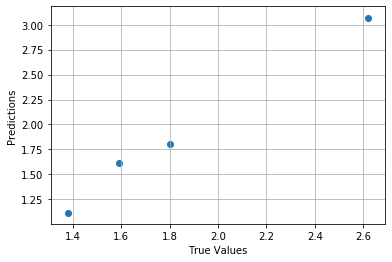

In [87]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

In [88]:
rmse = sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("RMSE: ", rmse)
print("R^2: ", r2)

RMSE:  0.2615414640153909
R^2:  0.6904361481009691


# Partial Least Square Regression

In [57]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
    mse = []
    component = np.arange(1, n_comp)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
        mse.append(mean_squared_error(y, y_cv))
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.show()
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
    
    return
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
"""   
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()
    return
""" 

"   \n    # Fit a line to the CV vs response\n    z = np.polyfit(y, y_c, 1)\n    with plt.style.context(('ggplot')):\n        fig, ax = plt.subplots(figsize=(9, 5))\n        ax.scatter(y_c, y, c='red', edgecolors='k')\n        #Plot the best fit line\n        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)\n        #Plot the ideal 1:1 line\n        ax.plot(y, y, color='green', linewidth=1)\n        plt.title('$R^{2}$ (CV): '+str(score_cv))\n        plt.xlabel('Predicted $^{\\circ}$Brix')\n        plt.ylabel('Measured $^{\\circ}$Brix')\n        plt.show()\n    return\n"

100% completed
Suggested number of components:  10



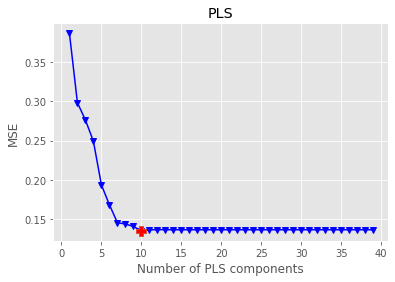

R2 calib: 1.000
R2 CV: 0.690
MSE calib: 0.000
MSE CV: 0.134


In [89]:
optimise_pls_cv(x_df,df_y_si, 40, plot_components=True)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x_df, df_y_si, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(16, 4094) (16, 1)
(4, 4094) (4, 1)


100% completed
Suggested number of components:  9



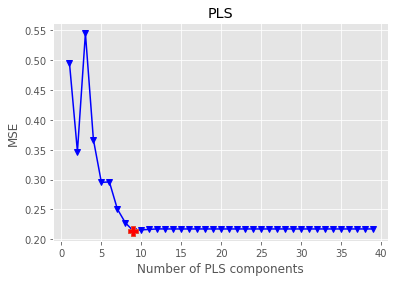

R2 calib: 0.999
R2 CV: 0.565
MSE calib: 0.000
MSE CV: 0.214


In [92]:
optimise_pls_cv(X_train,y_train, 40, plot_components=True)

R2_pred:  0.7494225314453108
R2_cv:  0.565446374026515

TEST
 [real, predictions]
[[1.5 1.1949480732115378]
 [2.61 2.7341989769612]
 [2.46 2.24264566960154]
 [2.49 2.2827371090655926]]



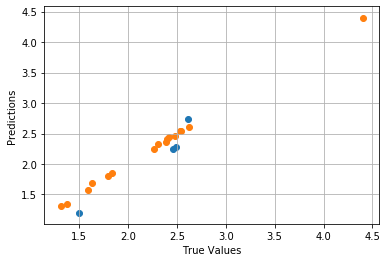

In [100]:
# Define PLS object
pls = PLSRegression(n_components=9)
# Fit
pls.fit(X_train, y_train)
# Cross-validation
y_pred = pls.predict(X_test)
y_pred1 = pls.predict(X_train)

# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
score_cv = r2_score(y_train, y_cv)

print("R2_pred: ", score_pred)
print("R2_cv: ",score_cv)
print("")

b=np.append(y_test, y_pred, axis=1)

print("TEST\n [real, predictions]")
print(b)
print("")

c=np.append(y_train, y_pred1, axis=1)

#print("TRAIN\n [real, predictions]")
#print(c)

plt.scatter(y_test, y_pred)
plt.scatter(y_train, y_pred1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

# Elastic Net

In [25]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [26]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [101]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train,y_train)   
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:1.00, MSE:0.07, RMSE:0.27
Alpha:0.0010, R2:1.00, MSE:0.02, RMSE:0.15
Alpha:0.0100, R2:1.00, MSE:0.06, RMSE:0.24
Alpha:0.1000, R2:1.00, MSE:0.07, RMSE:0.26
Alpha:0.3000, R2:1.00, MSE:0.02, RMSE:0.13
Alpha:0.5000, R2:1.00, MSE:0.00, RMSE:0.03
Alpha:0.7000, R2:1.00, MSE:0.00, RMSE:0.03
Alpha:1.0000, R2:1.00, MSE:0.00, RMSE:0.03


In [102]:
model = ElasticNet(alpha=0.01).fit(X_train,y_train)   
score = model.score(X_train, y_train)
print("Train score: ", score)
pred_y = model.predict(X_test)


rmse = sqrt(mean_squared_error(y_test, pred_y))
r2 = r2_score(y_test, pred_y)
print("RMSE: ", rmse)
print("R^2: ", r2)

Train score:  0.9999992080529491
RMSE:  0.23785190057536498
R^2:  0.7145994369665113


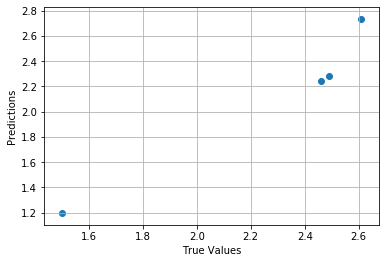

In [103]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

# MLP

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, Reshape #, MaxPooling1D
from keras.callbacks import ReduceLROnPlateau
from keras.layers.noise import GaussianNoise
from keras.optimizers import Adam
#for CNN
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import normalize, to_categorical

Using TensorFlow backend.


In [47]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
#print(X_test)

In [48]:
DROPOUT = 0.5

# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=4094, activation='relu'))
model.add(Dropout(DROPOUT))
#model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1048320   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,065,825
Trainable params: 1,065,825
Non-trainable params: 0
_________________________________________________________________


In [49]:
opt = Adam(lr=2e-3, decay=1e-3 / 200)
#model.compile(loss="mean_squared_error", optimizer=opt)


def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model.compile(loss='mse', optimizer=keras.optimizers.Adadelta(lr=0.01))    
    
#model.compile(optimizer = "opt", loss = root_mean_squared_error, metrics =["accuracy"])

# train the model
print("[INFO] training model...")
model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=800)


[INFO] training model...



Train on 37 samples, validate on 10 samples
Epoch 1/200





37/37 [==============================] - 1s 22ms/step - loss: 3.6068 - val_loss: 3.3483
Epoch 2/200
37/37 [==============================] - 0s 512us/step - loss: 3.6045 - val_loss: 3.3471
Epoch 3/200
37/37 [==============================] - 0s 539us/step - loss: 3.6046 - val_loss: 3.3459
Epoch 4/200
37/37 [==============================] - 0s 566us/step - loss: 3.6012 - val_loss: 3.3447
Epoch 5/200
37/37 [==============================] - 0s 593us/step - loss: 3.6000 - val_loss: 3.3435
Epoch 6/200
37/37 [==============================] - 0s 539us/step - loss: 3.5953 - val_loss: 3.3423
Epoch 7/200
37/37 [==============================] - 0s 971us/step - loss: 3.5948 - val_loss: 3.3413
Epoch 8/200
37/37 [==============================] - 0s 728us/step - loss: 3.5969 - val_loss: 3.3407
Epoch 9/200
37/37 [==============================] - 0s 512us/step - loss: 3.5973 - val_loss: 3.3399
Epoch 10/200
3

Epoch 62/200
37/37 [==============================] - 0s 513us/step - loss: 3.5115 - val_loss: 3.2523
Epoch 63/200
37/37 [==============================] - 0s 540us/step - loss: 3.5061 - val_loss: 3.2503
Epoch 64/200
37/37 [==============================] - 0s 514us/step - loss: 3.5079 - val_loss: 3.2484
Epoch 65/200
37/37 [==============================] - 0s 500us/step - loss: 3.5115 - val_loss: 3.2466
Epoch 66/200
37/37 [==============================] - 0s 472us/step - loss: 3.5060 - val_loss: 3.2446
Epoch 67/200
37/37 [==============================] - 0s 499us/step - loss: 3.5067 - val_loss: 3.2427
Epoch 68/200
37/37 [==============================] - 0s 445us/step - loss: 3.5002 - val_loss: 3.2408
Epoch 69/200
37/37 [==============================] - 0s 459us/step - loss: 3.5061 - val_loss: 3.2390
Epoch 70/200
37/37 [==============================] - 0s 486us/step - loss: 3.4979 - val_loss: 3.2370
Epoch 71/200
37/37 [==============================] - 0s 486us/step - loss: 3.4970

Epoch 142/200
37/37 [==============================] - 0s 514us/step - loss: 3.3151 - val_loss: 3.0463
Epoch 143/200
37/37 [==============================] - 0s 487us/step - loss: 3.3003 - val_loss: 3.0426
Epoch 144/200
37/37 [==============================] - 0s 513us/step - loss: 3.2980 - val_loss: 3.0390
Epoch 145/200
37/37 [==============================] - 0s 515us/step - loss: 3.3081 - val_loss: 3.0355
Epoch 146/200
37/37 [==============================] - 0s 488us/step - loss: 3.2945 - val_loss: 3.0318
Epoch 147/200
37/37 [==============================] - 0s 433us/step - loss: 3.2913 - val_loss: 3.0281
Epoch 148/200
37/37 [==============================] - 0s 460us/step - loss: 3.2824 - val_loss: 3.0243
Epoch 149/200
37/37 [==============================] - 0s 460us/step - loss: 3.2808 - val_loss: 3.0205
Epoch 150/200
37/37 [==============================] - 0s 486us/step - loss: 3.2749 - val_loss: 3.0166
Epoch 151/200
37/37 [==============================] - 0s 460us/step - lo

In [62]:
rdlr = ReduceLROnPlateau(patience=25, factor=0.5, min_lr=1e-6, monitor='val_loss', verbose=1)

h = model.fit(X_train, y_train, epochs=600, batch_size=8, validation_split=0.2, callbacks=[rdlr], verbose=2)

Train on 37 samples, validate on 10 samples
Epoch 1/600
 - 1s - loss: 0.4555 - val_loss: 1.5627
Epoch 2/600
 - 1s - loss: 0.4546 - val_loss: 1.5401
Epoch 3/600
 - 1s - loss: 0.4720 - val_loss: 1.5792
Epoch 4/600
 - 1s - loss: 0.4518 - val_loss: 1.5307
Epoch 5/600
 - 1s - loss: 0.4465 - val_loss: 1.5420
Epoch 6/600
 - 1s - loss: 0.4340 - val_loss: 1.5079
Epoch 7/600
 - 1s - loss: 0.4562 - val_loss: 1.5052
Epoch 8/600
 - 1s - loss: 0.4474 - val_loss: 1.4902
Epoch 9/600
 - 1s - loss: 0.4409 - val_loss: 1.4584
Epoch 10/600
 - 1s - loss: 0.4424 - val_loss: 1.4471
Epoch 11/600
 - 1s - loss: 0.4418 - val_loss: 1.5361
Epoch 12/600
 - 1s - loss: 0.4470 - val_loss: 1.5424
Epoch 13/600
 - 1s - loss: 0.4400 - val_loss: 1.5291
Epoch 14/600
 - 1s - loss: 0.4433 - val_loss: 1.5477
Epoch 15/600
 - 1s - loss: 0.4445 - val_loss: 1.5546
Epoch 16/600
 - 1s - loss: 0.4454 - val_loss: 1.5831
Epoch 17/600
 - 1s - loss: 0.4408 - val_loss: 1.5605
Epoch 18/600
 - 1s - loss: 0.4538 - val_loss: 1.5612
Epoch 19/60

Epoch 147/600
 - 1s - loss: 0.4302 - val_loss: 1.5266
Epoch 148/600
 - 1s - loss: 0.4339 - val_loss: 1.5270
Epoch 149/600
 - 1s - loss: 0.4239 - val_loss: 1.5273
Epoch 150/600
 - 1s - loss: 0.4376 - val_loss: 1.5266
Epoch 151/600
 - 1s - loss: 0.4414 - val_loss: 1.5272
Epoch 152/600
 - 1s - loss: 0.4368 - val_loss: 1.5276
Epoch 153/600
 - 1s - loss: 0.4285 - val_loss: 1.5278
Epoch 154/600
 - 1s - loss: 0.4326 - val_loss: 1.5277
Epoch 155/600
 - 1s - loss: 0.4462 - val_loss: 1.5271
Epoch 156/600
 - 1s - loss: 0.4395 - val_loss: 1.5268
Epoch 157/600
 - 1s - loss: 0.4324 - val_loss: 1.5270
Epoch 158/600
 - 1s - loss: 0.4311 - val_loss: 1.5266
Epoch 159/600
 - 1s - loss: 0.4272 - val_loss: 1.5263
Epoch 160/600
 - 1s - loss: 0.4452 - val_loss: 1.5257

Epoch 00160: ReduceLROnPlateau reducing learning rate to 0.00015624999650754035.
Epoch 161/600
 - 1s - loss: 0.4243 - val_loss: 1.5258
Epoch 162/600
 - 1s - loss: 0.4427 - val_loss: 1.5258
Epoch 163/600
 - 1s - loss: 0.4375 - val_loss: 1.5258


Epoch 290/600
 - 1s - loss: 0.4330 - val_loss: 1.5250
Epoch 291/600
 - 1s - loss: 0.4405 - val_loss: 1.5250
Epoch 292/600
 - 1s - loss: 0.4342 - val_loss: 1.5250
Epoch 293/600
 - 1s - loss: 0.4381 - val_loss: 1.5250
Epoch 294/600
 - 1s - loss: 0.4446 - val_loss: 1.5250
Epoch 295/600
 - 1s - loss: 0.4245 - val_loss: 1.5250
Epoch 296/600
 - 1s - loss: 0.4494 - val_loss: 1.5250
Epoch 297/600
 - 1s - loss: 0.4350 - val_loss: 1.5250
Epoch 298/600
 - 1s - loss: 0.4225 - val_loss: 1.5250
Epoch 299/600
 - 1s - loss: 0.4336 - val_loss: 1.5250
Epoch 300/600
 - 1s - loss: 0.4387 - val_loss: 1.5250
Epoch 301/600
 - 1s - loss: 0.4332 - val_loss: 1.5249
Epoch 302/600
 - 1s - loss: 0.4533 - val_loss: 1.5249
Epoch 303/600
 - 1s - loss: 0.4382 - val_loss: 1.5249
Epoch 304/600
 - 1s - loss: 0.4291 - val_loss: 1.5249
Epoch 305/600
 - 1s - loss: 0.4339 - val_loss: 1.5249
Epoch 306/600
 - 1s - loss: 0.4271 - val_loss: 1.5249
Epoch 307/600
 - 1s - loss: 0.4321 - val_loss: 1.5249
Epoch 308/600
 - 1s - loss: 

Epoch 438/600
 - 1s - loss: 0.4252 - val_loss: 1.5249
Epoch 439/600
 - 1s - loss: 0.4310 - val_loss: 1.5249
Epoch 440/600
 - 1s - loss: 0.4183 - val_loss: 1.5249
Epoch 441/600
 - 1s - loss: 0.4329 - val_loss: 1.5249
Epoch 442/600
 - 1s - loss: 0.4314 - val_loss: 1.5249
Epoch 443/600
 - 1s - loss: 0.4366 - val_loss: 1.5249
Epoch 444/600
 - 1s - loss: 0.4486 - val_loss: 1.5249
Epoch 445/600
 - 1s - loss: 0.4318 - val_loss: 1.5249
Epoch 446/600
 - 1s - loss: 0.4323 - val_loss: 1.5249
Epoch 447/600
 - 1s - loss: 0.4377 - val_loss: 1.5249
Epoch 448/600
 - 1s - loss: 0.4347 - val_loss: 1.5249
Epoch 449/600
 - 1s - loss: 0.4247 - val_loss: 1.5249
Epoch 450/600
 - 1s - loss: 0.4408 - val_loss: 1.5249
Epoch 451/600
 - 1s - loss: 0.4365 - val_loss: 1.5249
Epoch 452/600
 - 1s - loss: 0.4201 - val_loss: 1.5249
Epoch 453/600
 - 1s - loss: 0.4600 - val_loss: 1.5249
Epoch 454/600
 - 1s - loss: 0.4514 - val_loss: 1.5249
Epoch 455/600
 - 1s - loss: 0.4278 - val_loss: 1.5249
Epoch 456/600
 - 1s - loss: 

Epoch 590/600
 - 1s - loss: 0.4331 - val_loss: 1.5249
Epoch 591/600
 - 1s - loss: 0.4332 - val_loss: 1.5249
Epoch 592/600
 - 1s - loss: 0.4214 - val_loss: 1.5249
Epoch 593/600
 - 1s - loss: 0.4465 - val_loss: 1.5249
Epoch 594/600
 - 1s - loss: 0.4361 - val_loss: 1.5249
Epoch 595/600
 - 1s - loss: 0.4265 - val_loss: 1.5249
Epoch 596/600
 - 1s - loss: 0.4368 - val_loss: 1.5249
Epoch 597/600
 - 1s - loss: 0.4270 - val_loss: 1.5249
Epoch 598/600
 - 1s - loss: 0.4364 - val_loss: 1.5249
Epoch 599/600
 - 1s - loss: 0.4340 - val_loss: 1.5249
Epoch 600/600
 - 1s - loss: 0.4438 - val_loss: 1.5249


In [63]:
y_predicted = model.predict(X_test)

# model evaluation
rmse = sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)
print("RMSE: ", rmse)
print("R^2: ",r2)

1.33411659850997
-1.9076098140571403


In [69]:
b=np.append(y_test, y_predicted, axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[1.63 1.118012547492981]
 [2.53 1.1178892850875854]
 [2.4 1.1190111637115479]
 [2.39 1.1186038255691528]
 [2.31 1.1183782815933228]
 [1.8 1.1180356740951538]
 [2.62 1.1192641258239746]
 [4.4 1.1188957691192627]
 [1.63 1.117609977722168]
 [1.5 1.1179851293563843]
 [1.8 1.1181913614273071]
 [1.38 1.1180763244628906]]


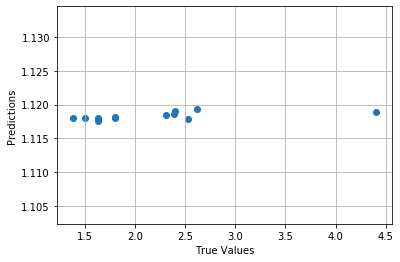

In [71]:
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

# Convolutional Neural Network

In [65]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
#print(X_test)
X_test

188.195100  188.260100  188.325000  188.390000  188.455000  188.520000  \
35    0.001942    0.001680    0.001769    0.001555    0.001976    0.001443   
5     0.001869    0.001621    0.001703    0.001499    0.001901    0.001392   
44    0.001968    0.001703    0.001797    0.001579    0.002009    0.001467   
48    0.001945    0.001683    0.001777    0.001561    0.001985    0.001447   
15    0.001911    0.001662    0.001747    0.001534    0.001947    0.001422   
26    0.001922    0.001664    0.001750    0.001539    0.001960    0.001427   
12    0.002001    0.001733    0.001818    0.001602    0.002034    0.001488   
56    0.002017    0.001751    0.001841    0.001618    0.002056    0.001502   
34    0.001941    0.001681    0.001770    0.001555    0.001974    0.001443   
38    0.001924    0.001666    0.001756    0.001544    0.001965    0.001434   
24    0.001950    0.001690    0.001780    0.001560    0.001991    0.001445   
31    0.001931    0.001673    0.001760    0.001541    0.001966    0.001436   

    188.585000  188.650000  188.714900  188.779900  ...  440.300000  \
35    0.001811    0.001757    0.001858    0.001759  ...    0.009459   
5     0.001744    0.001694    0.001789    0.001694  ...    0.009778   
44    0.001832    0.001778    0.001893    0.001784  ...    0.009369   
48    0.001813    0.001759    0.001866    0.001762  ...    0.009467   
15    0.001784    0.001733    0.001833    0.001730  ...    0.009395   
26    0.001789    0.001739    0.001841    0.001740  ...    0.009287   
12    0.001860    0.001809    0.001912    0.001812  ...    0.009519   
56    0.001885    0.001829    0.001933    0.001831  ...    0.009554   
34    0.001805    0.001753    0.001862    0.001760  ...    0.009429   
38    0.001792    0.001744    0.001844    0.001740  ...    0.009413   
24    0.001819    0.001764    0.001869    0.001763  ...    0.009264   
31    0.001795    0.001748    0.001848    0.001749  ...    0.009306   

    440.353000  440.406100  440.459200  440.512300  440.565300  440.618400  \
35    0.024789    0.039555    0.052539    0.055079    0.031357    0.013462   
5     0.025239    0.039833    0.052818    0.054146    0.030239    0.013039   
44    0.024194    0.038571    0.050760    0.053431    0.030757    0.013450   
48    0.024440    0.038970    0.051471    0.053686    0.030573    0.013225   
15    0.024276    0.038708    0.051270    0.054081    0.031143    0.013503   
26    0.024398    0.039071    0.051843    0.054894    0.031643    0.013588   
12    0.024705    0.039226    0.051976    0.054433    0.030961    0.013338   
56    0.024827    0.039551    0.052294    0.054697    0.031189    0.013492   
34    0.024951    0.039949    0.053156    0.055755    0.031693    0.013509   
38    0.024716    0.039471    0.052239    0.054580    0.031010    0.013299   
24    0.024203    0.038787    0.051400    0.054596    0.031559    0.013622   
31    0.024457    0.039228    0.052146    0.055048    0.031634    0.013594   

    440.671400  440.724500  440.777500  
35    0.007122    0.006264    0.005974  
5     0.007087    0.006425    0.006249  
44    0.007265    0.006472    0.006224  
48    0.007104    0.006317    0.006069  
15    0.007239    0.006436    0.006225  
26    0.007146    0.006214    0.005899  
12    0.007150    0.006321    0.006043  
56    0.007249    0.006446    0.006189  
34    0.007096    0.006213    0.005896  
38    0.007079    0.006253    0.006003  
24    0.007192    0.006274    0.005977  
31    0.007151    0.006238    0.005933  

[12 rows x 4094 columns]

In [66]:
#Hyperparameters for the network
DENSE = 128
DROPOUT = 0.5
C1_K  = 8 #Number of kernels/feature extractors for first layer
C1_S  = 32 #Width of the convolutional mini networks
C2_K  = 16
C2_S  = 32

activation='relu'

input_dim = X_train.shape[1]

#The model
def make_model():
    model = Sequential()
    #Adding a bit of GaussianNoise also works as regularization
    model.add(GaussianNoise(0.05, input_shape=(input_dim,)))
    #First two is number of filter + kernel size
    model.add(Reshape((input_dim, 1)))
    model.add(Conv1D(C1_K, (C1_S), activation=activation, border_mode="same"))
    model.add(Conv1D(C2_K, (C2_S), border_mode="same", activation=activation))
    model.add(Flatten())
    model.add(Dropout(DROPOUT))
    model.add(Dense(DENSE, activation=activation))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mse', optimizer=keras.optimizers.Adadelta(lr=0.01))#, metrics=['mean_absolute_error'])

    return model

In [67]:
model = make_model()
print(model.summary())

C:\Users\olivier.nicolini\.conda\envs\tf_env\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(8, 32, activation="relu", padding="same")`
C:\Users\olivier.nicolini\.conda\envs\tf_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 32, activation="relu", padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_2 (GaussianNo (None, 4094)              0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 4094, 1)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4094, 8)           264       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 4094, 16)          4112      
_________________________________________________________________
flatten_2 (Flatten)          (None, 65504)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 65504)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8384640   
__________

In [73]:

rdlr = ReduceLROnPlateau(patience=25, factor=0.5, min_lr=1e-6, monitor='val_loss', verbose=1)

h = model.fit(X_train, y_train, epochs=600, batch_size=8, validation_split=0.2, callbacks=[rdlr], verbose=2)

Train on 37 samples, validate on 10 samples
Epoch 1/600
 - 1s - loss: 0.4461 - val_loss: 1.2368
Epoch 2/600
 - 1s - loss: 0.4516 - val_loss: 1.2181
Epoch 3/600
 - 1s - loss: 0.4393 - val_loss: 1.2502
Epoch 4/600
 - 1s - loss: 0.4409 - val_loss: 1.2507
Epoch 5/600
 - 1s - loss: 0.4432 - val_loss: 1.2678
Epoch 6/600
 - 1s - loss: 0.4525 - val_loss: 1.3302
Epoch 7/600
 - 1s - loss: 0.4368 - val_loss: 1.2931
Epoch 8/600
 - 1s - loss: 0.4557 - val_loss: 1.2650
Epoch 9/600
 - 1s - loss: 0.4375 - val_loss: 1.2672
Epoch 10/600
 - 1s - loss: 0.4455 - val_loss: 1.2836
Epoch 11/600
 - 1s - loss: 0.4488 - val_loss: 1.2653
Epoch 12/600
 - 1s - loss: 0.4532 - val_loss: 1.2485
Epoch 13/600
 - 1s - loss: 0.4473 - val_loss: 1.2118
Epoch 14/600
 - 1s - loss: 0.4523 - val_loss: 1.2733
Epoch 15/600
 - 1s - loss: 0.4382 - val_loss: 1.2439
Epoch 16/600
 - 1s - loss: 0.4428 - val_loss: 1.2378
Epoch 17/600
 - 1s - loss: 0.4420 - val_loss: 1.3046
Epoch 18/600
 - 1s - loss: 0.4328 - val_loss: 1.2915
Epoch 19/60

Epoch 148/600
 - 1s - loss: 0.4224 - val_loss: 1.2348
Epoch 149/600
 - 1s - loss: 0.4279 - val_loss: 1.2352
Epoch 150/600
 - 1s - loss: 0.4389 - val_loss: 1.2356
Epoch 151/600
 - 1s - loss: 0.4232 - val_loss: 1.2357
Epoch 152/600
 - 1s - loss: 0.4232 - val_loss: 1.2348
Epoch 153/600
 - 1s - loss: 0.4318 - val_loss: 1.2341
Epoch 154/600
 - 1s - loss: 0.4362 - val_loss: 1.2342
Epoch 155/600
 - 1s - loss: 0.4301 - val_loss: 1.2335
Epoch 156/600
 - 1s - loss: 0.4353 - val_loss: 1.2337
Epoch 157/600
 - 1s - loss: 0.4308 - val_loss: 1.2344
Epoch 158/600
 - 1s - loss: 0.4391 - val_loss: 1.2352
Epoch 159/600
 - 1s - loss: 0.4354 - val_loss: 1.2358
Epoch 160/600
 - 1s - loss: 0.4282 - val_loss: 1.2338

Epoch 00160: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
Epoch 161/600
 - 1s - loss: 0.4358 - val_loss: 1.2341
Epoch 162/600
 - 1s - loss: 0.4225 - val_loss: 1.2347
Epoch 163/600
 - 1s - loss: 0.4243 - val_loss: 1.2343
Epoch 164/600
 - 1s - loss: 0.4318 - val_loss: 1.2345
E

Epoch 291/600
 - 1s - loss: 0.4358 - val_loss: 1.2322
Epoch 292/600
 - 1s - loss: 0.4281 - val_loss: 1.2323
Epoch 293/600
 - 1s - loss: 0.4431 - val_loss: 1.2323
Epoch 294/600
 - 1s - loss: 0.4330 - val_loss: 1.2323
Epoch 295/600
 - 1s - loss: 0.4450 - val_loss: 1.2323
Epoch 296/600
 - 1s - loss: 0.4420 - val_loss: 1.2323
Epoch 297/600
 - 1s - loss: 0.4397 - val_loss: 1.2322
Epoch 298/600
 - 1s - loss: 0.4425 - val_loss: 1.2322
Epoch 299/600
 - 1s - loss: 0.4442 - val_loss: 1.2322
Epoch 300/600
 - 1s - loss: 0.4283 - val_loss: 1.2322
Epoch 301/600
 - 1s - loss: 0.4343 - val_loss: 1.2322
Epoch 302/600
 - 1s - loss: 0.4380 - val_loss: 1.2322
Epoch 303/600
 - 1s - loss: 0.4337 - val_loss: 1.2322
Epoch 304/600
 - 1s - loss: 0.4353 - val_loss: 1.2322
Epoch 305/600
 - 1s - loss: 0.4371 - val_loss: 1.2322
Epoch 306/600
 - 1s - loss: 0.4327 - val_loss: 1.2322
Epoch 307/600
 - 1s - loss: 0.4465 - val_loss: 1.2322
Epoch 308/600
 - 1s - loss: 0.4296 - val_loss: 1.2322
Epoch 309/600
 - 1s - loss: 

 - 1s - loss: 0.4331 - val_loss: 1.2322
Epoch 438/600
 - 1s - loss: 0.4289 - val_loss: 1.2322
Epoch 439/600
 - 1s - loss: 0.4369 - val_loss: 1.2322
Epoch 440/600
 - 1s - loss: 0.4318 - val_loss: 1.2322
Epoch 441/600
 - 1s - loss: 0.4290 - val_loss: 1.2322
Epoch 442/600
 - 1s - loss: 0.4338 - val_loss: 1.2322
Epoch 443/600
 - 1s - loss: 0.4387 - val_loss: 1.2322
Epoch 444/600
 - 1s - loss: 0.4405 - val_loss: 1.2322
Epoch 445/600
 - 1s - loss: 0.4371 - val_loss: 1.2322
Epoch 446/600
 - 1s - loss: 0.4404 - val_loss: 1.2322
Epoch 447/600
 - 1s - loss: 0.4280 - val_loss: 1.2322
Epoch 448/600
 - 1s - loss: 0.4336 - val_loss: 1.2322
Epoch 449/600
 - 1s - loss: 0.4249 - val_loss: 1.2322
Epoch 450/600
 - 1s - loss: 0.4212 - val_loss: 1.2322
Epoch 451/600
 - 1s - loss: 0.4233 - val_loss: 1.2322
Epoch 452/600
 - 1s - loss: 0.4354 - val_loss: 1.2322
Epoch 453/600
 - 1s - loss: 0.4379 - val_loss: 1.2322
Epoch 454/600
 - 1s - loss: 0.4250 - val_loss: 1.2322
Epoch 455/600
 - 1s - loss: 0.4352 - val_l

Epoch 589/600
 - 1s - loss: 0.4302 - val_loss: 1.2322
Epoch 590/600
 - 1s - loss: 0.4345 - val_loss: 1.2322
Epoch 591/600
 - 1s - loss: 0.4356 - val_loss: 1.2322
Epoch 592/600
 - 1s - loss: 0.4331 - val_loss: 1.2322
Epoch 593/600
 - 1s - loss: 0.4365 - val_loss: 1.2322
Epoch 594/600
 - 1s - loss: 0.4393 - val_loss: 1.2322
Epoch 595/600
 - 1s - loss: 0.4372 - val_loss: 1.2322
Epoch 596/600
 - 1s - loss: 0.4465 - val_loss: 1.2322
Epoch 597/600
 - 1s - loss: 0.4309 - val_loss: 1.2322
Epoch 598/600
 - 1s - loss: 0.4497 - val_loss: 1.2322
Epoch 599/600
 - 1s - loss: 0.4281 - val_loss: 1.2322
Epoch 600/600
 - 1s - loss: 0.4298 - val_loss: 1.2322


In [77]:
y_predicted = model.predict(X_test)

# model evaluation
rmse = sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)
print("RMSE: ", rmse)
print("R^2: ", r2)

RMSE:  1.2294385384398099
R^2:  -1.4692337033311618


In [75]:
b=np.append(y_test, y_predicted, axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[1.63 1.2509443759918213]
 [2.53 1.2520112991333008]
 [2.4 1.2502681016921997]
 [2.39 1.2502981424331665]
 [2.31 1.251228928565979]
 [1.8 1.2509185075759888]
 [2.62 1.2504569292068481]
 [4.4 1.250625491142273]
 [1.63 1.2513407468795776]
 [1.5 1.2513595819473267]
 [1.8 1.250507116317749]
 [1.38 1.2509829998016357]]


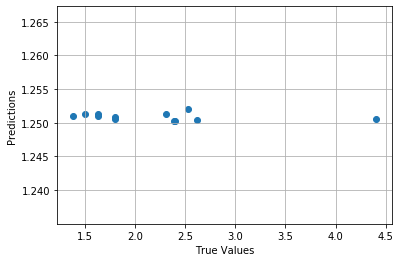

In [76]:
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

# Random Forest

In [30]:
y_test=np.ravel(y_test)
print(y_test.shape)
y_train=np.ravel(y_train)
print(y_train.shape)

(4,)
(16,)


In [31]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 2300, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [32]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.07


In [33]:
rmse = sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("RMSE: ", rmse)
print("R^2: ", r2)

RMSE:  0.08967837143067968
R^2:  -0.12478465768656744


In [34]:
y_test= y_test.reshape((len(y_test), 1))
print(y_test.shape)
print(type(y_test))
predictions=predictions.reshape((len(y_test), 1))
print(predictions.shape)
print(type(y_test))
#print((y_test, predictions))

(4, 1)
<class 'numpy.ndarray'>
(4, 1)
<class 'numpy.ndarray'>


In [35]:
b=np.append(y_test, predictions, axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[2.39 2.341160869565214]
 [2.61 2.46456086956519]
 [2.42 2.4262739130434796]
 [2.46 2.5526913043478134]]


Text(0, 0.5, 'Predictions')

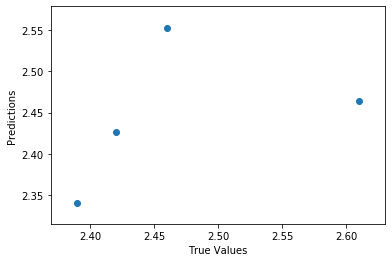

In [36]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [102]:
#I don't remember what's this

#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)

# MultiOutput Random Forest

In [139]:
multi_y = concentration[:,2:]
#print (multi_y)
print (type(multi_y))
df_y= pd.DataFrame(multi_y)
print (type(df_y))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [140]:
X_train, X_test, y_train, y_test = train_test_split(x_df, df_y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(47, 4094) (47, 7)
(12, 4094) (12, 7)


In [141]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=150,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=30,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=150,
                                                

In [142]:
y_multirf = regr_multirf.predict(X_test)

In [143]:
print(y_test.shape)
print(y_multirf.shape)

(12, 7)
(12, 7)


In [144]:
rmse = sqrt(mean_squared_error(y_test, y_multirf))
r2 = r2_score(y_test, y_multirf)

print("R^2: ", r2)
print("RMSE: ", rmse)

R^2:  0.9081471005969817
RMSE:  0.09092271675402586


In [145]:
b=np.append(np.around(y_test,3), np.around(y_multirf,3), axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[1.8 0.17 0.48 0.37 0.022000000000000002 0.17300000000000001 0.0017 1.69
  0.175 0.508 0.282 0.022 0.232 0.002]
 [2.53 0.13 0.13 0.09300000000000001 0.024 0.012 0.033 2.505 0.127 0.135
  0.139 0.024 0.012 0.035]
 [4.4 0.2 0.14 0.053 0.022000000000000002 0.012 0.0468 3.652 0.178 0.177
  0.07 0.022 0.014 0.047]
 [2.54 0.16 1.13 0.095 0.027000000000000003 0.027000000000000003 0.0568
  2.54 0.171 1.111 0.139 0.026 0.022 0.054]
 [1.59 0.14 0.32 0.06 0.024 0.016 0.001 1.563 0.134 0.256 0.085 0.023
  0.015 0.002]
 [1.5 0.12 0.09 0.04 0.021 0.009000000000000001 0.0009 1.572 0.138 0.231
  0.061 0.022 0.016 0.003]
 [2.49 0.12 0.13 0.11 0.024 0.012 0.036000000000000004 2.522 0.129 0.138
  0.102 0.024 0.013 0.042]
 [2.48 0.12 0.13 0.052000000000000005 0.024 0.012 0.03 2.531 0.134 0.194
  0.1 0.024 0.03 0.044]
 [2.39 0.2 0.65 1.1 0.021 0.267 0.0542 2.426 0.191 0.631 0.987 0.022
  0.266 0.048]
 [1.5 0.12 0.09 0.04 0.021 0.009000000000000001 0.0009 1.558 0.151 0.267
  0.062 0.022

Text(0, 0.5, 'Predictions')

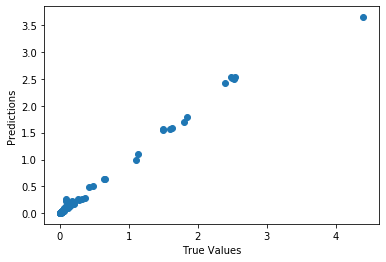

In [146]:
plt.scatter(y_test, y_multirf)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [151]:
b=np.append(y_test[0,:],y_multirf[0,:], axis=1)

print("[real, predictions]")
print(b)

TypeError: '(0, slice(None, None, None))' is an invalid key

In [164]:
print(y_test[0]shape)
print(y_multirf[0].T.shape)

(12,)
(7,)


In [184]:
y_pred=np.around(y_multirf,2)
y_pred[:,0]

array([1.69, 2.51, 3.65, 2.54, 1.56, 1.57, 2.52, 2.53, 2.43, 1.56, 1.8 ,
       1.58])

In [185]:
y_test[0].values

array([1.8, 2.53, 4.4, 2.54, 1.59, 1.5, 2.49, 2.48, 2.39, 1.5, 1.84, 1.63],
      dtype=object)

In [186]:
print("real: ", y_test[0].values)
print("pred: ", y_pred[:,0])

real:  [1.8 2.53 4.4 2.54 1.59 1.5 2.49 2.48 2.39 1.5 1.84 1.63]
pred:  [1.69 2.51 3.65 2.54 1.56 1.57 2.52 2.53 2.43 1.56 1.8  1.58]
